<a href="https://colab.research.google.com/github/JeanAlvesR/CursoMachineLearning/blob/master/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


##Base Credit

In [27]:
with open('credit.pkl','rb') as f:
  x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

In [28]:
#N_estimators = 10 => 10 árvores de decisão serão criadas aleatoriamente. A árvore que tomará
# as decisões será com base na quantidade de saídas que mais se repetir.
#Entropy => A estruturação das árvores será baseada no ganho de informação
#BEM SUPERFICIAL
random_forest_credit = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
random_forest_credit.fit(x_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [29]:
previsoes = random_forest_credit.predict(x_credit_test)

In [30]:
accuracy_score(y_credit_test, previsoes)
# 1 árvore == 98.2%
# Naive Bayes == 93.8%
#Com 10 árvores randomicas, o resultado foi de 96.8% 
#Com 40, o resultado foi para 98.4%
#Com 100, 98.2%

#Nem sempre o aumento das árvores pressupõe um aumento na precisão.

0.982

0.982

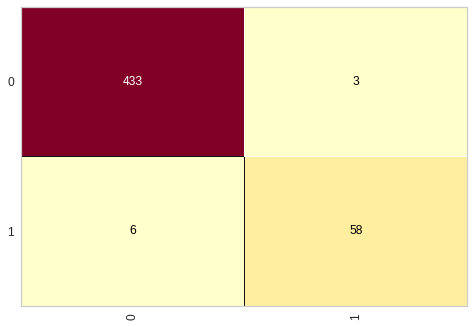

In [31]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)

In [32]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.91      0.93        64

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500

